In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
from funzioni import plot_bias_atmos
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_atmos
from funzioni import plot_mean_cluster_tos
from funzioni import plot_bias_2_models_atmos
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_atmos
from funzioni import plot_zonmean
from funzioni import plot_zonmean_2_cluster
from funzioni import plot_mean_cluster_zonmean
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonmean
from funzioni import bs_sample_mean
from funzioni import bs_compute_array_mean_std_95cl
from funzioni import plot_bs_95cl_mean_std
from funzioni import bs_compute_matrix10
from funzioni import plot_bs_mean_cluster_matrix10
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random

Caricamento dei file pickle

In [2]:
# Caricamento di models e models_atmos
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
    era_na_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)

Bootstrap

Cluster 0 (4 modelli)

In [3]:
#Estrazione in modo random di 4 modelli per 1000 iterazioni
sample_mean_cluster0 = bs_sample_mean(1000,models_atmos,list_cluster0)

In [4]:
#Calcolo di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
array_mean_cluster0,array_std_cluster0,array_2th_cluster0,array_97th_cluster0 = bs_compute_array_mean_std_95cl(1000,sample_mean_cluster0)

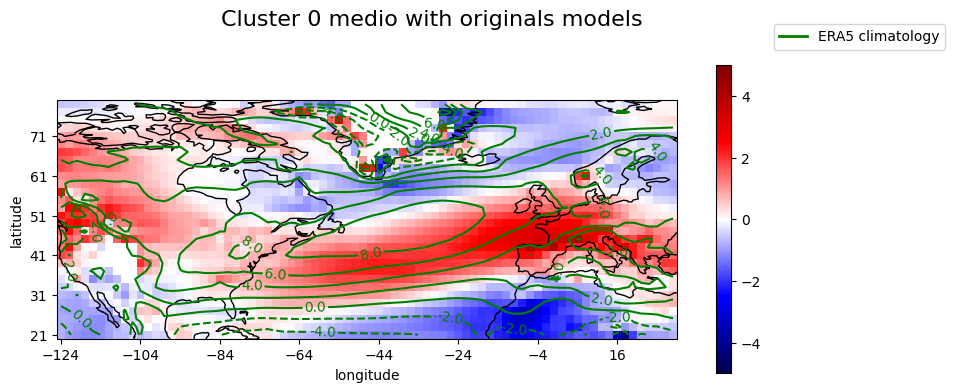

In [5]:
#Plot cluster medio
plot_mean_cluster_atmos(list_cluster0,models_atmos,era_na_seas_mean,'Cluster 0 medio with originals models','cl0_mean.pdf',-5,5,(10,4))

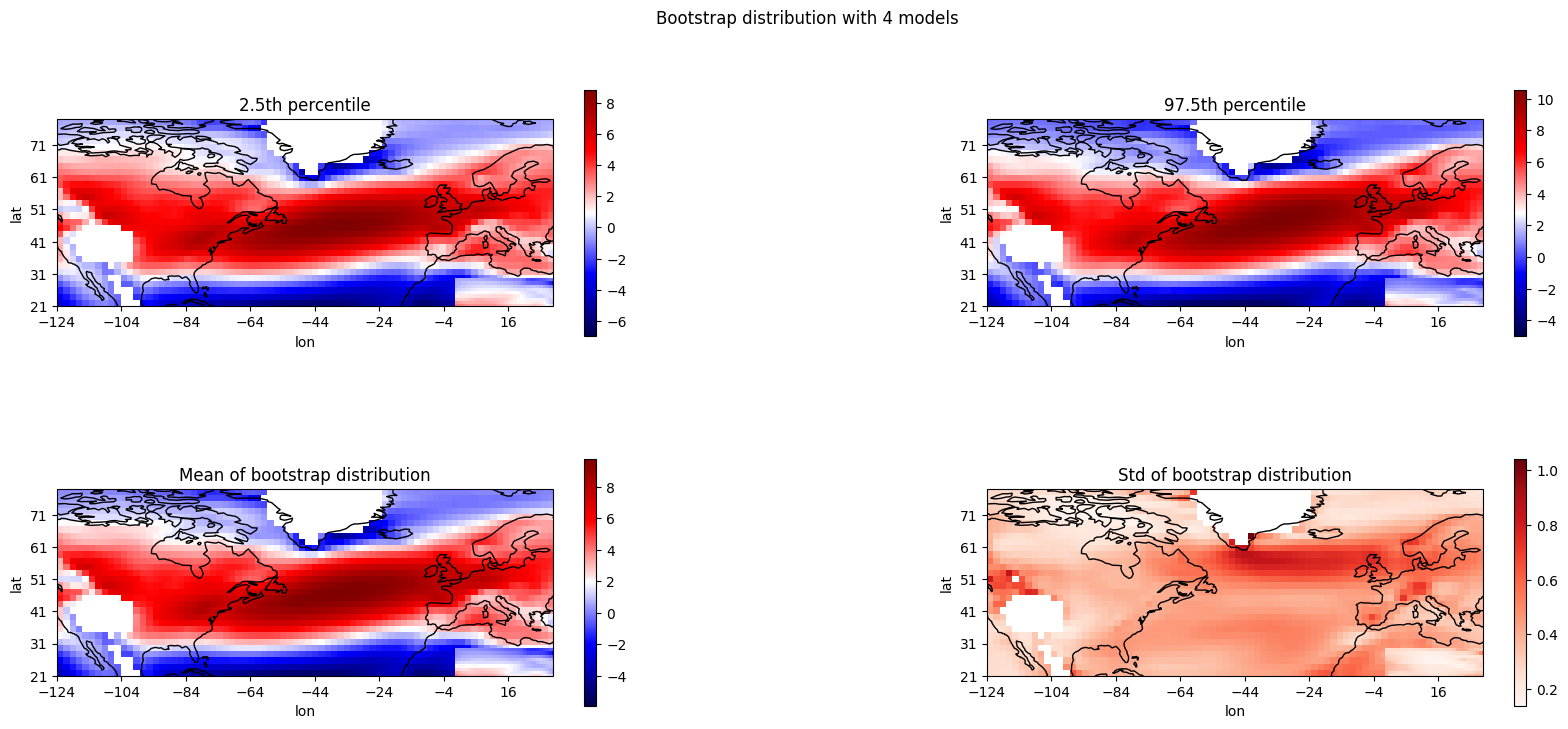

In [6]:
#plot di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
plot_bs_95cl_mean_std(list_cluster0,models_atmos,array_mean_cluster0,array_std_cluster0,array_2th_cluster0,array_97th_cluster0)

In [7]:
#Determinazione della matrice di 1,0. 1 si ha quando l'elemento ij-esimo è <= 5th oppure >= 95th percentile --> significativamente differenti
matrix10_cluster0 = bs_compute_matrix10(list_cluster0,models_atmos,array_2th_cluster0,array_97th_cluster0)

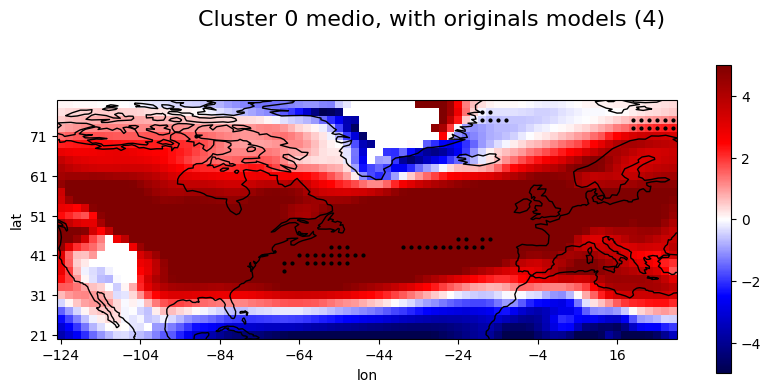

In [8]:
#plot del cluster medio con puntini di significatività
plot_bs_mean_cluster_matrix10(list_cluster0,models_atmos,(10,4),-5,5,matrix10_cluster0,'Cluster 0 medio, with originals models (4)')

In [9]:
print(matrix10_cluster0.shape)
a  = 30 * 78
print(a)
number = 0
for i in range(30):
    for j in range(78):
        if matrix10_cluster0[i,j] == 1:
            number = number + 1
print(number)

(30, 78)
2340
55


Cluster 1 (7 modelli)

In [10]:
#Estrazione in modo random di 4 modelli per 1000 iterazioni
sample_mean_cluster1 = bs_sample_mean(1000,models_atmos,list_cluster1)

In [11]:
#Calcolo di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
array_mean_cluster1,array_std_cluster1,array_2th_cluster1,array_97th_cluster1 = bs_compute_array_mean_std_95cl(1000,sample_mean_cluster1)

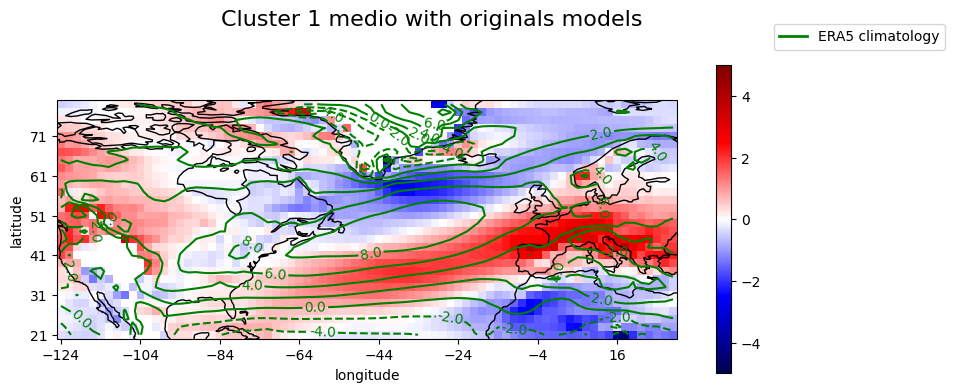

In [12]:
#Plot cluster medio
plot_mean_cluster_atmos(list_cluster1,models_atmos,era_na_seas_mean,'Cluster 1 medio with originals models','cl1_mean.pdf',-5,5,(10,4))

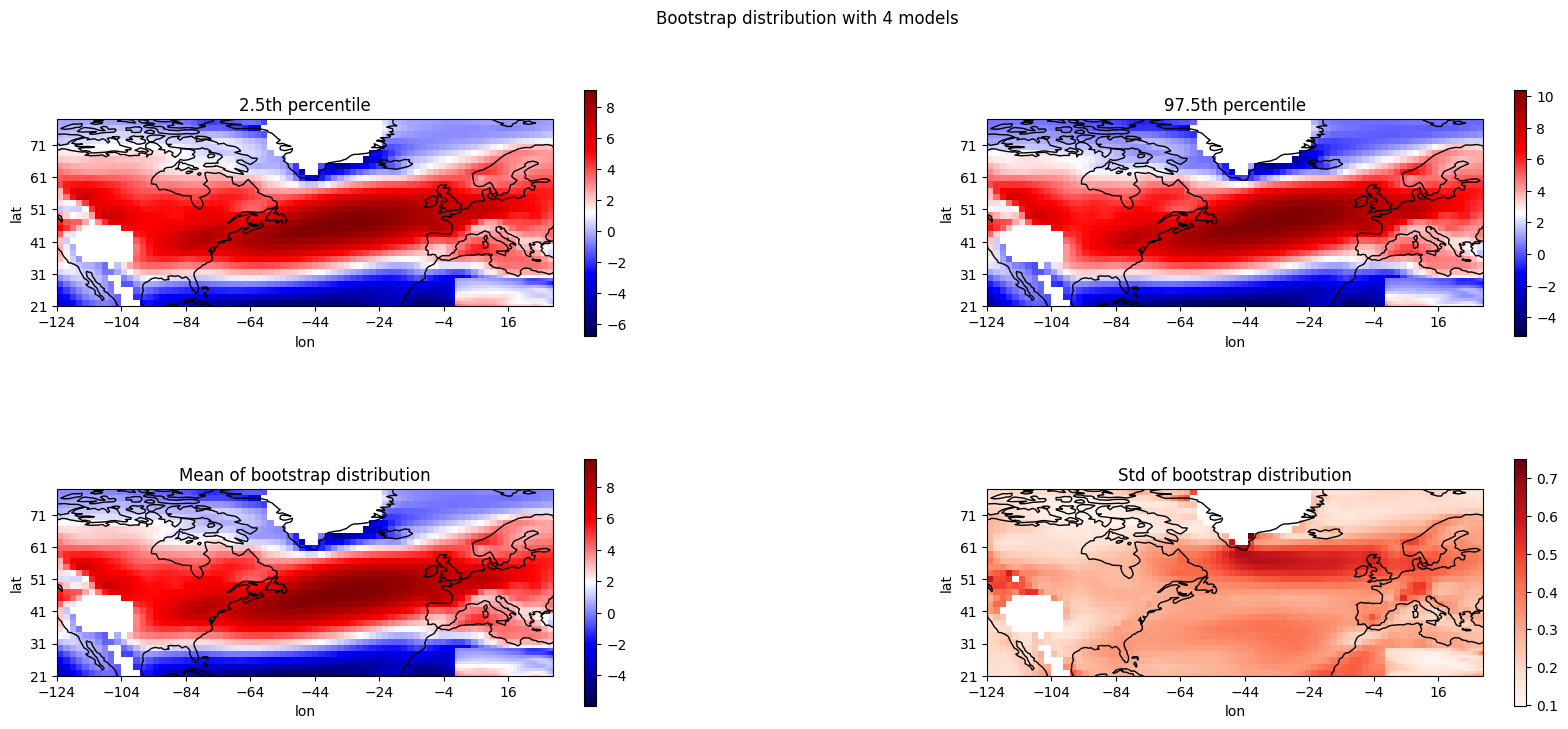

In [13]:
#plot di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
plot_bs_95cl_mean_std(list_cluster1,models_atmos,array_mean_cluster1,array_std_cluster1,array_2th_cluster1,array_97th_cluster1)

In [14]:
#Determinazione della matrice di 1,0. 1 si ha quando l'elemento ij-esimo è <= 5th oppure >= 95th percentile --> significativamente differenti
matrix10_cluster1 = bs_compute_matrix10(list_cluster1,models_atmos,array_2th_cluster1,array_97th_cluster1)

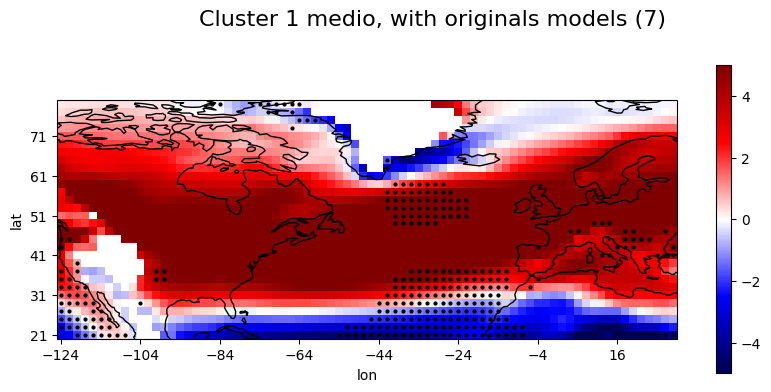

In [15]:
#plot del cluster medio con puntini di significatività
plot_bs_mean_cluster_matrix10(list_cluster1,models_atmos,(10,4),-5,5,matrix10_cluster1,'Cluster 1 medio, with originals models (7)')

In [16]:
print(matrix10_cluster1.shape)
a  = 30 * 78
print(a)
number = 0
for i in range(30):
    for j in range(78):
        if matrix10_cluster1[i,j] == 1:
            number = number + 1
print(number)

(30, 78)
2340
303


Cluster 2 (13 modelli)

In [17]:
#Estrazione in modo random di 4 modelli per 1000 iterazioni
sample_mean_cluster2 = bs_sample_mean(1000,models_atmos,list_cluster2)

In [18]:
#Calcolo di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
array_mean_cluster2,array_std_cluster2,array_2th_cluster2,array_97th_cluster2 = bs_compute_array_mean_std_95cl(1000,sample_mean_cluster2)

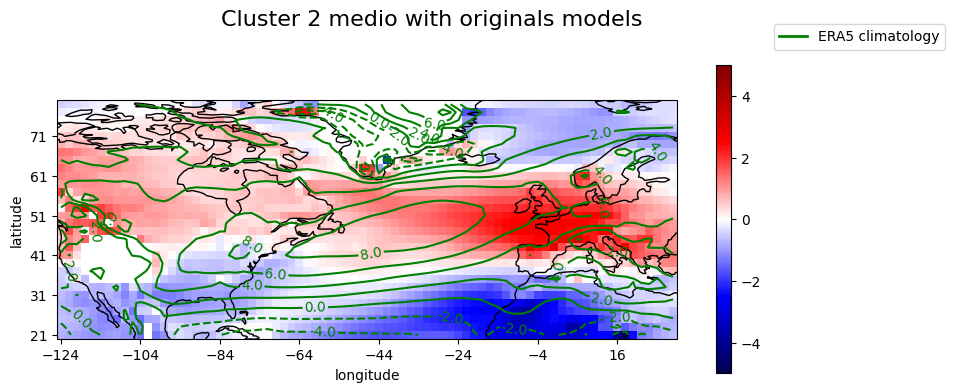

In [19]:
#Plot cluster medio
plot_mean_cluster_atmos(list_cluster2,models_atmos,era_na_seas_mean,'Cluster 2 medio with originals models','cl2_mean.pdf',-5,5,(10,4))

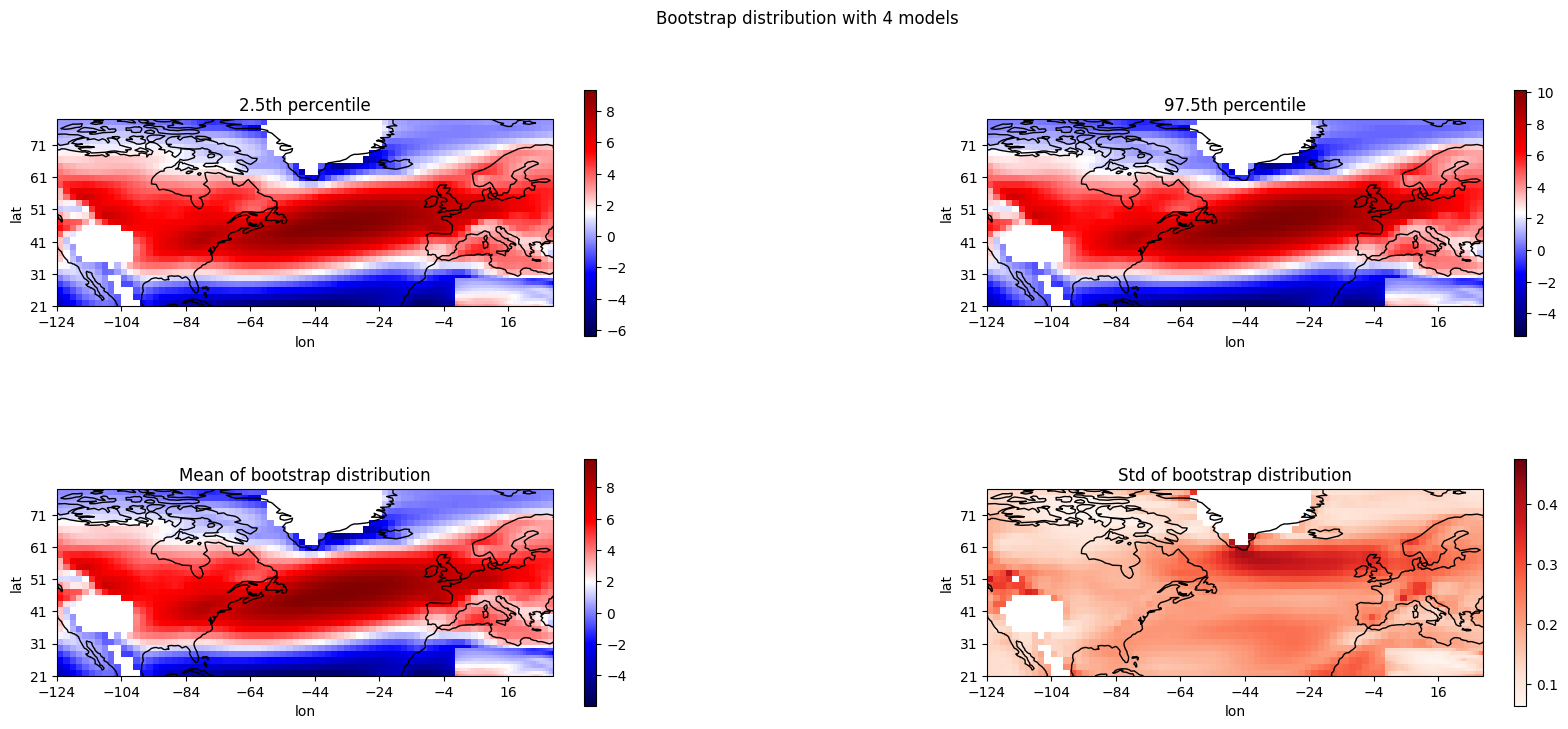

In [20]:
#plot di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
plot_bs_95cl_mean_std(list_cluster2,models_atmos,array_mean_cluster2,array_std_cluster2,array_2th_cluster2,array_97th_cluster2)

In [21]:
#Determinazione della matrice di 1,0. 1 si ha quando l'elemento ij-esimo è <= 5th oppure >= 95th percentile --> significativamente differenti
matrix10_cluster2 = bs_compute_matrix10(list_cluster2,models_atmos,array_2th_cluster2,array_97th_cluster2)

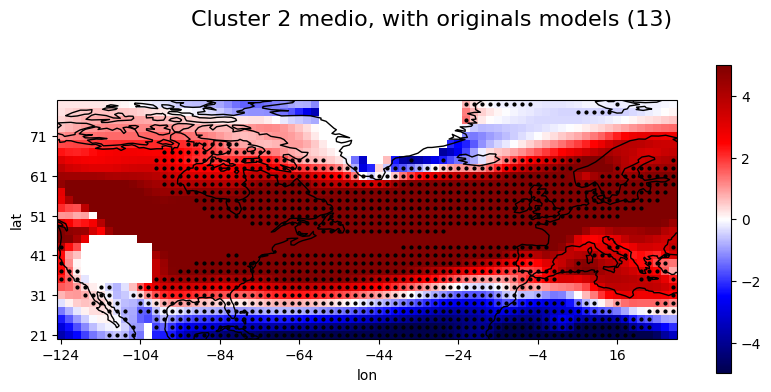

In [22]:
#plot del cluster medio con puntini di significatività
plot_bs_mean_cluster_matrix10(list_cluster2,models_atmos,(10,4),-5,5,matrix10_cluster2,'Cluster 2 medio, with originals models (13)')

In [23]:
print(matrix10_cluster2.shape)
a  = 30 * 78
print(a)
number = 0
for i in range(30):
    for j in range(78):
        if matrix10_cluster2[i,j] == 1:
            number = number + 1
print(number)

(30, 78)
2340
1199


Cluster 3 (11 modelli)

In [24]:
#Estrazione in modo random di 4 modelli per 1000 iterazioni
sample_mean_cluster3 = bs_sample_mean(1000,models_atmos,list_cluster3)

In [25]:
#Calcolo di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
array_mean_cluster3,array_std_cluster3,array_2th_cluster3,array_97th_cluster3 = bs_compute_array_mean_std_95cl(1000,sample_mean_cluster3)

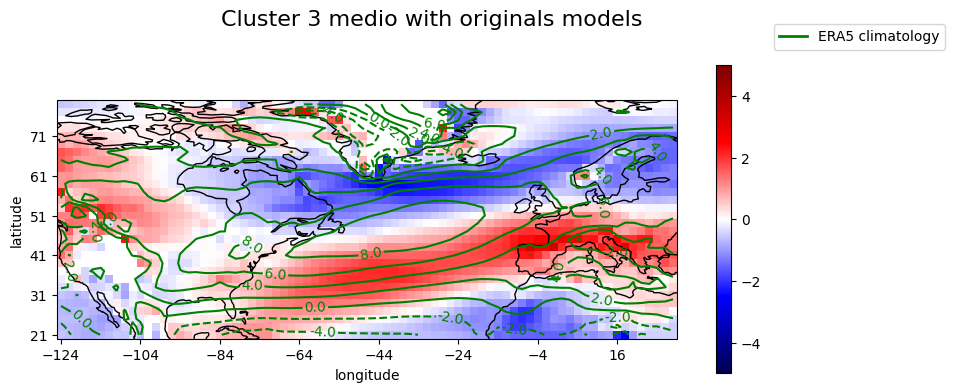

In [26]:
#Plot cluster medio
plot_mean_cluster_atmos(list_cluster3,models_atmos,era_na_seas_mean,'Cluster 3 medio with originals models','cl3_mean.pdf',-5,5,(10,4))

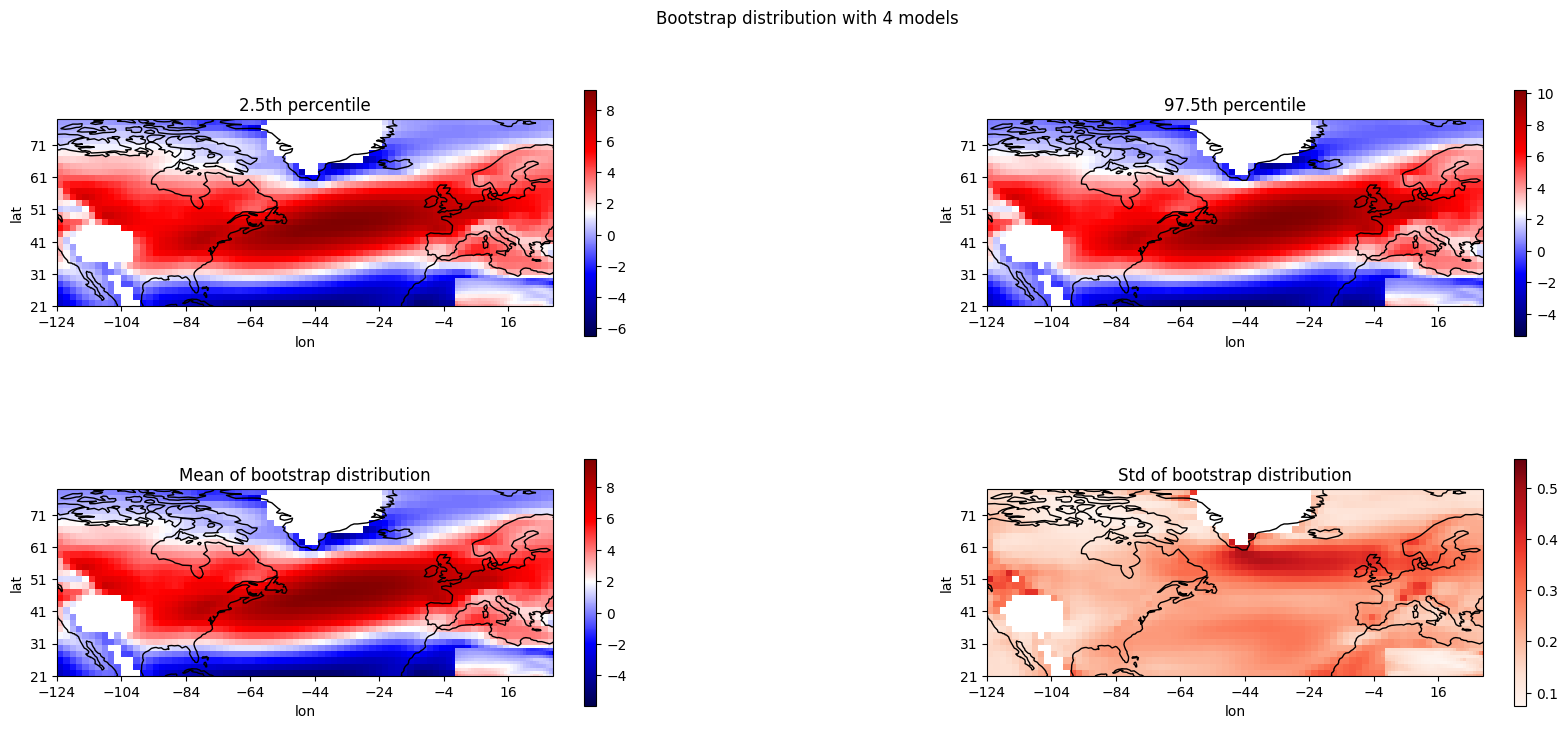

In [27]:
#plot di array_mean, array_std, array_2th_percentile, array_97th_percentile della distribuzione bootstrap
plot_bs_95cl_mean_std(list_cluster3,models_atmos,array_mean_cluster3,array_std_cluster3,array_2th_cluster3,array_97th_cluster3)

In [28]:
#Determinazione della matrice di 1,0. 1 si ha quando l'elemento ij-esimo è <= 5th oppure >= 95th percentile --> significativamente differenti
matrix10_cluster3 = bs_compute_matrix10(list_cluster3,models_atmos,array_2th_cluster3,array_97th_cluster3)

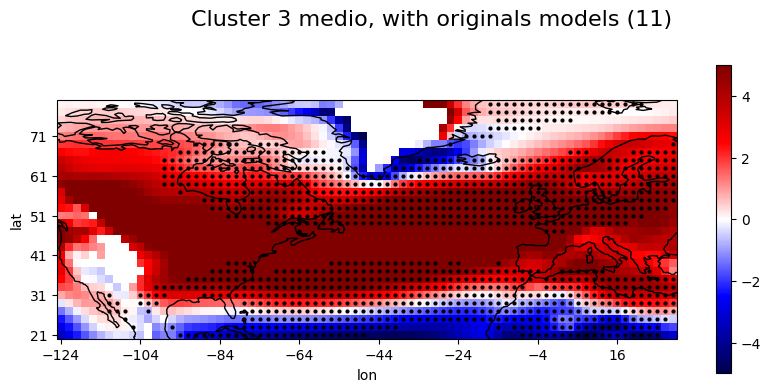

In [29]:
#plot del cluster medio con puntini di significatività
plot_bs_mean_cluster_matrix10(list_cluster3,models_atmos,(10,4),-5,5,matrix10_cluster3,'Cluster 3 medio, with originals models (11)')

In [30]:
print(matrix10_cluster3.shape)
a  = 30 * 78
print(a)
number = 0
for i in range(30):
    for j in range(78):
        if matrix10_cluster3[i,j] == 1:
            number = number + 1
print(number)

(30, 78)
2340
1137


Salvataggio in un file pickle

In [31]:
# Salvataggio in un file Pickle
with open('bootstrap.pickle', 'wb') as f: #'wb' = write binary
    pickle.dump(array_2th_cluster0, f) #salvataggio array cluster 0
    pickle.dump(array_97th_cluster0, f)
    pickle.dump(array_mean_cluster0, f)
    pickle.dump(array_std_cluster0, f)
    pickle.dump(matrix10_cluster0, f)

    pickle.dump(array_2th_cluster1, f) #salvataggio array cluster 1
    pickle.dump(array_97th_cluster1, f)
    pickle.dump(array_mean_cluster1, f)
    pickle.dump(array_std_cluster1, f)
    pickle.dump(matrix10_cluster1, f)

    pickle.dump(array_2th_cluster2, f) #salvataggio array cluster 2
    pickle.dump(array_97th_cluster2, f)
    pickle.dump(array_mean_cluster2, f)
    pickle.dump(array_std_cluster2, f)
    pickle.dump(matrix10_cluster2, f)

    pickle.dump(array_2th_cluster3, f) #salvataggio array cluster 3
    pickle.dump(array_97th_cluster3, f)
    pickle.dump(array_mean_cluster3, f)
    pickle.dump(array_std_cluster3, f)
    pickle.dump(matrix10_cluster3, f)